In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
data = np.loadtxt('/home/tushuhei/buildingMLSystem/ch02/seeds_dataset.txt')

In [2]:
n_neighbors = 15
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [3]:
def fit_and_plot(clf, X):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))

In [4]:
from sklearn import cross_validation
def evaluate(X, y):
    kf = cross_validation.KFold(X.shape[0], n_folds=10, shuffle=True)
    result = []
    for train_indexes, test_indexes in kf:
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
        clf.fit(X[train_indexes], y[train_indexes])
        result.append(np.mean(clf.predict(X[test_indexes]) == y[test_indexes]))
    return np.mean(result)

データを正規化しないと、片方の次元によった学習をしてしまう。

0.833333333333


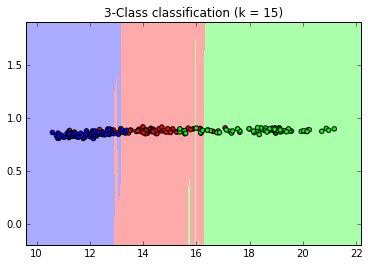

In [5]:
X = data[:, (0, 2)]
y = data[:, -1]
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)
fit_and_plot(clf, X)
print(evaluate(X, y))

正規化を施して、それぞれの次元を平等に扱うことにする。精度も少し向上する。

0.852380952381


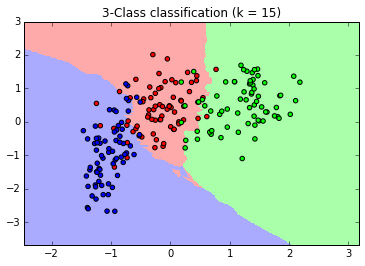

In [6]:
features = data[:, :-1]
features -= features.mean(0)
features /= features.std(0)
X = features[:, (0, 2)]
y = data[:, -1]
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)
fit_and_plot(clf, X)
print(evaluate(X, y))